The shape of our dataset is:  (6, 15) (6, 1) (6,)
(6, 15)


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 15. Setting n_informative to n_dim.
  warnings.warn(


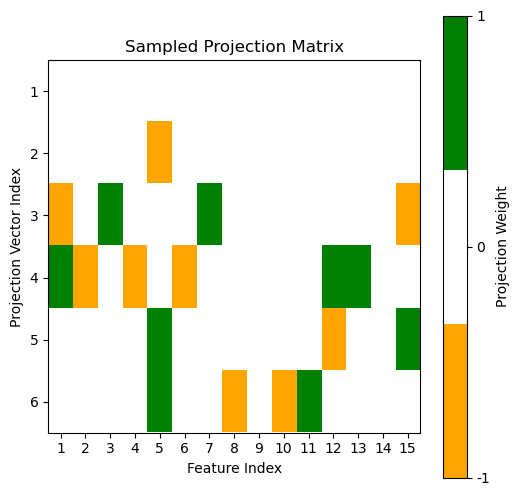

In [12]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap

from treeple._lib.sklearn.tree._criterion import Gini
from treeple.tree._oblique_splitter import BestObliqueSplitterTester
from treeple.datasets import make_trunk_classification

# %%
# Initialize patch splitter
# -------------------------
# The patch splitter is used to generate patches for the projection matrices.
# We will initialize the patch with some dummy values for the sake of this
# example.

criterion = Gini(1, np.array((0, 1)))
max_features = 6
min_samples_leaf = 1
min_weight_leaf = 0.0
random_state = np.random.RandomState(1)

feature_combinations = 3.0
monotonic_cst = None
missing_value_feature_mask = None

n_features = 15
n_samples = 6

# initialize some dummy data
#X = np.ones((n_samples, n_features), dtype=np.float32)
#y = np.array([0, 0, 0, 1, 1]).reshape(-1, 1).astype(np.float64)

X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_features, n_informative=600, seed=0)
y = y.reshape(-1,1).astype(np.float64)
X= X.astype(np.float32)

sample_weight = np.ones(n_samples)

print("The shape of our dataset is: ", X.shape, y.shape, sample_weight.shape)

# %%
# Initialize the splitter
# -----------------------
# The splitter is initialized in the decision-tree classes, but we expose
# a testing interface here to demonstrate how the projection matrices are
# sampled internally.
#
# .. warning:: Do not use this interface directly in practice.

splitter = BestObliqueSplitterTester(
    criterion,
    max_features,
    min_samples_leaf,
    min_weight_leaf,
    random_state,
    monotonic_cst,
    feature_combinations,
)
splitter.init_test(X, y, sample_weight, missing_value_feature_mask)

# %%
# Generate projection matrix
# --------------------------
# Sample the projection matrix that consists of randomly sampled features
# with an average of ``feature_combinations * max_features`` non-zeros
# in the ``(max_features, n_features)`` matrix.

projection_matrix = splitter.sample_projection_matrix_py()
print(projection_matrix.shape)

# Visualize the projection matrix
cmap = ListedColormap(["orange", "white", "green"])

# Create a heatmap to visualize the indices
fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(projection_matrix, cmap=cmap, aspect=n_features / max_features, interpolation="none")

ax.set(title="Sampled Projection Matrix", xlabel="Feature Index", ylabel="Projection Vector Index")
ax.set_xticks(np.arange(n_features))
ax.set_yticks(np.arange(max_features))
ax.set_yticklabels(np.arange(max_features, dtype=int) + 1)
ax.set_xticklabels(np.arange(n_features, dtype=int) + 1)

# Create a mappable object
sm = ScalarMappable(cmap=cmap)
sm.set_array([])  # You can set an empty array or values here

# Create a color bar with labels for each feature set
colorbar = fig.colorbar(sm, ax=ax, ticks=[0, 0.5, 1], format="%d")
colorbar.set_label("Projection Weight")
colorbar.ax.set_yticklabels(["-1", "0", "1"])

plt.show()



In [34]:
def plot_proj(max_features=10, 
              feature_combinations=1.5,
              n_features=10,
              n_samples=8):

    criterion = Gini(1, np.array((0, 1)))

    min_samples_leaf = 1
    min_weight_leaf = 0.0
    random_state = np.random.RandomState(1)

    feature_combinations = 3.0
    monotonic_cst = None
    missing_value_feature_mask = None



    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_features, n_informative=600, seed=0)
    y = y.reshape(-1,1).astype(np.float64)
    X= X.astype(np.float32)

    sample_weight = np.ones(n_samples)

    print("The shape of our dataset is: ", X.shape, y.shape, sample_weight.shape)

    # %%
    # Initialize the splitter
    # -----------------------
    # The splitter is initialized in the decision-tree classes, but we expose
    # a testing interface here to demonstrate how the projection matrices are
    # sampled internally.
    #
    # .. warning:: Do not use this interface directly in practice.

    splitter = BestObliqueSplitterTester(
        criterion,
        max_features,
        min_samples_leaf,
        min_weight_leaf,
        random_state,
        monotonic_cst,
        feature_combinations,
    )
    splitter.init_test(X, y, sample_weight, missing_value_feature_mask)

    # %%
    # Generate projection matrix
    # --------------------------
    # Sample the projection matrix that consists of randomly sampled features
    # with an average of ``feature_combinations * max_features`` non-zeros
    # in the ``(max_features, n_features)`` matrix.

    projection_matrix = splitter.sample_projection_matrix_py()
    print(projection_matrix.shape)

    # Visualize the projection matrix
    cmap = ListedColormap(["orange", "white", "green"])

    # Create a heatmap to visualize the indices
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.imshow(projection_matrix, cmap=cmap, aspect=n_features / max_features, interpolation="none")

    ax.set(title="Sampled Projection Matrix", xlabel="Feature Index", ylabel="Projection Vector Index")
    ax.set_xticks(np.arange(n_features))
    ax.set_yticks(np.arange(max_features))
    ax.set_yticklabels(np.arange(max_features, dtype=int) + 1)
    ax.set_xticklabels(np.arange(n_features, dtype=int) + 1)

    # Create a mappable object
    sm = ScalarMappable(cmap=cmap)
    sm.set_array([])  # You can set an empty array or values here

    # Create a color bar with labels for each feature set
    colorbar = fig.colorbar(sm, ax=ax, ticks=[0, 0.5, 1], format="%d")
    colorbar.set_label("Projection Weight")
    colorbar.ax.set_yticklabels(["-1", "0", "1"])

    plt.show()

    print(f"n_feature = ", n_features, 
          "\nn_samples = ", n_samples, 
          "\nmax_features = ", max_features, 
          "\nfeature_combinations = ", feature_combinations)
    print("max_features * feature_combinations = ", max_features * feature_combinations)
    print("Number of non-zeros: ",len(projection_matrix.nonzero()[0]))
    return projection_matrix



c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


The shape of our dataset is:  (1000, 100) (1000, 1) (1000,)
(200, 100)


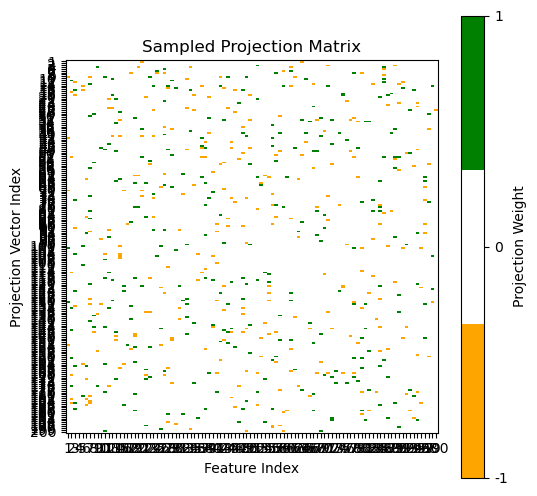

n_feature =  100 
n_samples =  1000 
max_features =  200 
feature_combinations =  3.0
max_features * feature_combinations =  600.0
Number of non-zeros:  600


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
plot_proj(n_features=100, max_features=200, feature_combinations=3.0, n_samples=1000)

In [ ]:
)